### Import Quasar catalog for DR14

In [1]:
import os
import sys
import glob
import numpy as np
import  scipy.optimize    as op
import matplotlib.pyplot as plt
import urllib.request
from astropy.io import fits as pyfits
from astropy.table import Table

local_dir="/home/colgoat/Jupyter/Entorno/cata_files/exDR14Qcat.fits"
local_file = os.path.join(local_dir)

    
catalog=Table.read(local_file)

w=(catalog['THING_ID']>0) & (catalog['Z']>=2.1) & (catalog['RA']!=catalog['DEC'])\
 & (catalog['RA']>0) & (catalog['MJD']< 56870) & (catalog['BI_CIV']<=0) \
 & ( (catalog['THING_ID']==207816820) | (catalog['THING_ID']==377924340) | (catalog['THING_ID']==225650603) 
 | (catalog['THING_ID']==392778186) | (catalog['THING_ID']==355050230) | (catalog['THING_ID']==336462818)  
 | (catalog['THING_ID']==299427309) | (catalog['THING_ID']==149703743) | (catalog['THING_ID']==432663422) 
 | (catalog['THING_ID']==251588367) | (catalog['THING_ID']==536573905)  )

reduced_cat=catalog[w]
reduced_cat
#catalog
#plt.style.use('bmh')
#plt.hist(reduced_cat['FIRST_SNR'])
#stats.describe(reduced_cat['FIRST_SNR'])

SDSS_NAME,RA,DEC,THING_ID,PLATE,MJD,FIBERID,SPECTRO,Z,Z_ERR,SOURCE_Z,Z_VI,Z_PIPE,Z_PIPE_ERR,ZWARNING,Z_PCA,Z_PCA_ER,Z_MGII,BOSS_TARGET1,ANCILLARY_TARGET1,ANCILLARY_TARGET2,EBOSS_TARGET0,EBOSS_TARGET1,EBOSS_TARGET2,N_SPEC_SDSS,N_SPEC_BOSS,N_SPEC,PLATE_DUPLICATE,MJD_DUPLICATE,FIBERID_DUPLICATE,SPECTRO_DUPLICATE,BI_CIV,ERR_BI_CIV,RUN_NUMBER,RERUN_NUMBER,COL_NUMBER,FIELD_NUMBER,OBJ_ID,PSFFLUX,IVAR_PSFFLUX,PSFMAG,ERR_PSFMAG,MI,GAL_EXT,RASS_COUNTS,RASS_COUNTS_SNR,SDSS2ROSAT_SEP,FLUX_0.2_2.0keV,FLUX_0.2_2.0keV_ERR,FLUX_2.0_12.0keV,FLUX_2.0_12.0keV_ERR,FLUX_0.2_12.0keV,FLUX_0.2_12.0keV_ERR,LUM_0.2_12.0keV,SDSS2XMM_SEP,GALEX_MATCHED,FUV,FUV_IVAR,NUV,NUV_IVAR,JMAG,ERR_JMAG,JSNR,JRDFLAG,HMAG,ERR_HMAG,HSNR,HRDFLAG,KMAG,ERR_KMAG,KSNR,KRDFLAG,SDSS2MASS_SEP,W1MAG,ERR_W1MAG,W1SNR,W1CHI2,W2MAG,ERR_W2MAG,W2SNR,W2CHI2,W3MAG,ERR_W3MAG,W3SNR,W3CHI2,W4MAG,ERR_W4MAG,W4SNR,W4CHI2,CC_FLAGS,PH_FLAGS,SDSS2WISE_SEP,UKIDSS_MATCHED,YFLUX,YFLUX_ERR,JFLUX,JFLUX_ERR,HFLUX,HFLUX_ERR,KFLUX,KFLUX_ERR,FIRST_MATCHED,FIRST_FLUX,FIRST_SNR,SDSS2FIRST_SEP
-,deg,deg,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,km / s,km / s,-,-,-,-,-,nanomaggies,-,mag,mag,-,mag,counts/s,-,arcsec,erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / s,arcsec,-,-,-,-,-,Vega,Vega,-,-,Vega,Vega,-,-,Vega,Vega,-,-,arcsec,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,arcsec,-,W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),-,mJy,-,arcsec
bytes18,float64,float64,int32,int16,int32,int16,bytes4,float64,float64,bytes4,float64,float64,float64,int16,float64,float64,float64,int64,int64,int64,int64,int64,int64,int16,int16,int16,int32[51],int32[51],int32[51],bytes1[51],float64,float64,int16,bytes1,int16,int16,bytes1,float64[5],float64[5],float64[5],float64[5],float64,float64[5],float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float64,float64,float32,int16,float64,float64,float32,int16,float64,float64,float32,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes4,bytes4,float64,float32,float64,float64,float64,float64,float64,float64,float64,float64,int16,float64,float64,float64
000043.13+104623.6,0.17973486041364595,10.773231908866133,207816820,6182,56190,718,BOSS,3.005,0.0,VI,3.005000114440918,2.995504140853882,0.0006966799846850336,0,3.0169102999999997,-1.0,-1.0,3298535424000,0,0,0,0,0,0,0,0,-1 .. -1,-1 .. -1,-1 .. -1,- .. -,0.0,0.0,0,-,0,0,-,0.69926917552948 .. 6.339705467224121,37.4472541809082 .. 2.379213809967041,22.847274780273438 .. 20.480327606201172,0.23554739356040955 .. 0.10812235623598099,-26.450527,0.29111263155937195 .. 0.08673632144927979,0.0,0.0,-1.0,--,--,--,--,--,--,--,--,1.0,-0.17561469972133634,7.2417462281258835,0.051094744354486465,38.157109483219976,--,--,--,-1,--,--,--,-1,--,--,--,-1,--,17.267,0.151,7.199999809265137,0.909,17.156,--,0.30000001192092896,0.9531,11.834,--,1.600000023841858,0.8321,8.558,0.151,3.0999999046325684,0.945,0000,BUUB,0.568887,1.0,2.0823967060410074e-31,2.866109134084514e-32,1.9651517239956425e-31,4.191943334905218e-32,2.7520297583259128e-31,4.162475160898041e-32,2.255682675965216e-31,5.913823916910617e-32,0,-1.0,-1.0,-1.0
005416.26+281024.3,13.56776467504153,28.173443170781212,355050230,6253,56574,924,BOSS,2.3890000000000002,0.0,VI,2.388999938964844,2.389201641082764,0.00031180441146716475,0,2.3840357999999995,2.389455,2.389455,2199023255552,0,0,0,0,0,0,0,0,-1 .. -1,-1 .. -1,-1 .. -1,- .. -,0.0,0.0,0,-,0,0,-,1.5042932033538818 .. 2.2706892490386963,15.566292762756348 .. 1.714791178703308,22.04738426208496 .. 21.509258270263672,0.17984707653522491 .. 0.3059007525444031,-24.766731,0.17492736876010895 .. 0.05211919546127319,0.0,0.0,-1.0,--,--,--,--,--,--,--,--,1.0,0.09660270065069199,13.769344091289975,-0.5608768463134766,19.690749071689872,--,--,--,-1,--,--,--,-1,--,--,--,-1,--,--,--,--,--,--,--,--,--,--

### Creating small catalog

In [3]:
small_cat=reduced_cat[0:168045]

#small_cat

for i in range(10):
    print("--", i + 1)
    print("Label:", small_cat['Z'][i])

-- 1
Label: 3.248
-- 2


IndexError: index 1 is out of bounds for axis 0 with size 1

### Plot data

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([2.748, 2.848, 2.948, 3.048, 3.148, 3.248, 3.348, 3.448, 3.548,
        3.648, 3.748]),
 <BarContainer object of 10 artists>)

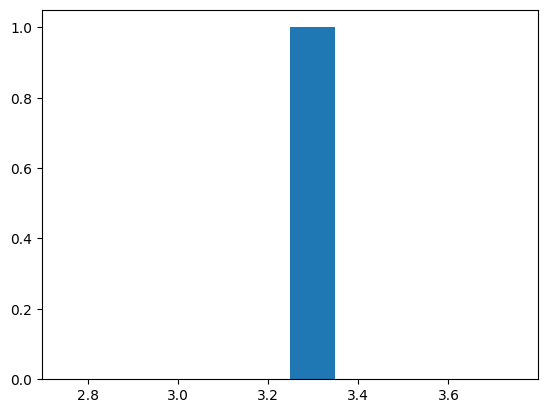

In [4]:
plt.hist(small_cat['Z'])

### Saving data as a new fits catalog file for quasars with query

In [5]:
from astropy.io import fits

archivo = fits.open('cataloguito.fits')
#archivo.info()
#archivo[1] = hdu # assuming the first extension is a table

#hdu[0] = archivo[0]
hdu = fits.BinTableHDU(small_cat)
archivo[1] = hdu


archivo.close()

passer = archivo

with fits.open('cataloguito.fits', mode='update') as passer:
    # Change something in hdul.
    
    passer[1] = hdu
    
    
    
    passer.flush()  # changes are written back to original.fits

# closing the file will also flush any changes and prevent further writing


### Checking the number of saved objects in small catalog

In [6]:
pruf=Table.read('cataloguito.fits')
pruf

SDSS_NAME,RA,DEC,THING_ID,PLATE,MJD,FIBERID,SPECTRO,Z,Z_ERR,SOURCE_Z,Z_VI,Z_PIPE,Z_PIPE_ERR,ZWARNING,Z_PCA,Z_PCA_ER,Z_MGII,BOSS_TARGET1,ANCILLARY_TARGET1,ANCILLARY_TARGET2,EBOSS_TARGET0,EBOSS_TARGET1,EBOSS_TARGET2,N_SPEC_SDSS,N_SPEC_BOSS,N_SPEC,PLATE_DUPLICATE,MJD_DUPLICATE,FIBERID_DUPLICATE,SPECTRO_DUPLICATE,BI_CIV,ERR_BI_CIV,RUN_NUMBER,RERUN_NUMBER,COL_NUMBER,FIELD_NUMBER,OBJ_ID,PSFFLUX,IVAR_PSFFLUX,PSFMAG,ERR_PSFMAG,MI,GAL_EXT,RASS_COUNTS,RASS_COUNTS_SNR,SDSS2ROSAT_SEP,FLUX_0.2_2.0keV,FLUX_0.2_2.0keV_ERR,FLUX_2.0_12.0keV,FLUX_2.0_12.0keV_ERR,FLUX_0.2_12.0keV,FLUX_0.2_12.0keV_ERR,LUM_0.2_12.0keV,SDSS2XMM_SEP,GALEX_MATCHED,FUV,FUV_IVAR,NUV,NUV_IVAR,JMAG,ERR_JMAG,JSNR,JRDFLAG,HMAG,ERR_HMAG,HSNR,HRDFLAG,KMAG,ERR_KMAG,KSNR,KRDFLAG,SDSS2MASS_SEP,W1MAG,ERR_W1MAG,W1SNR,W1CHI2,W2MAG,ERR_W2MAG,W2SNR,W2CHI2,W3MAG,ERR_W3MAG,W3SNR,W3CHI2,W4MAG,ERR_W4MAG,W4SNR,W4CHI2,CC_FLAGS,PH_FLAGS,SDSS2WISE_SEP,UKIDSS_MATCHED,YFLUX,YFLUX_ERR,JFLUX,JFLUX_ERR,HFLUX,HFLUX_ERR,KFLUX,KFLUX_ERR,FIRST_MATCHED,FIRST_FLUX,FIRST_SNR,SDSS2FIRST_SEP
-,deg,deg,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,km / s,km / s,-,-,-,-,-,nanomaggies,-,mag,mag,-,mag,counts/s,-,arcsec,erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / s,arcsec,-,-,-,-,-,Vega,Vega,-,-,Vega,Vega,-,-,Vega,Vega,-,-,arcsec,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,arcsec,-,W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),-,mJy,-,arcsec
bytes18,float64,float64,int32,int16,int32,int16,bytes4,float64,float64,bytes4,float64,float64,float64,int16,float64,float64,float64,int64,int64,int64,int64,int64,int64,int16,int16,int16,int32[51],int32[51],int32[51],bytes1[51],float64,float64,int16,bytes1,int16,int16,bytes1,float64[5],float64[5],float64[5],float64[5],float64,float64[5],float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float64,float64,float32,int16,float64,float64,float32,int16,float64,float64,float32,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes4,bytes4,float64,float32,float64,float64,float64,float64,float64,float64,float64,float64,int16,float64,float64,float64
113437.00+623423.5,173.65418883359618,62.57320165036267,536573905,7107,56740,667,BOSS,3.248,0.0,VI,3.247999906539917,3.248299598693848,0.0003707199066411704,0,3.2464201,-1.0,-1.0,3298535686144,0,1024,0,0,0,0,1,1,0 .. -1,0 .. -1,0 .. -1,- .. -,0.0,0.0,0,-,0,0,-,0.5764795541763306 .. 4.656691074371338,19.690444946289062 .. 1.1425701379776,23.039026260375977 .. 20.803373336791992,0.38178515434265137 .. 0.20787853002548218,-26.342548,0.0464259535074234 .. 0.01383250392973423,0.0,0.0,-1.0,--,--,--,--,--,--,--,--,1.0,-0.0934818759560585,3.7953007149492586,-0.11485450714826585,444.5071124784394,--,--,--,-1,--,--,--,-1,--,--,--,-1,--,17.472,0.139,7.800000190734863,0.9232,16.859,0.302,3.5999999046325684,0.8375,12.385,--,1.2000000476837158,1.009,8.911,0.139,0.5,0.8327,0000,BBUU,0.695445,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,23.17,155.68954499999995,0.634001


### Comparing the FITS properties between saved and prior catalog

In [7]:
nuevo = fits.open('cataloguito.fits')
nuevo.info()

Filename: cataloguito.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   (7055,)   uint8   
  1  DR14Q_v4_4    1 BinTableHDU    357   1R x 105C   [18A, D, D, J, I, J, I, 4A, D, D, 4A, D, D, D, I, D, D, D, K, K, K, K, K, K, I, I, I, 51J, 51J, 51J, 51A, D, D, I, 1A, I, I, 1A, 5D, 5D, 5D, 5D, D, 5D, D, D, D, D, D, D, D, D, D, D, D, E, D, D, D, D, D, D, E, I, D, D, E, I, D, D, E, I, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, 4A, 4A, D, E, D, D, D, D, D, D, D, D, I, D, D, D]   


In [8]:
nuevo = fits.open(local_file)
nuevo.info()

Filename: /home/colgoat/Jupyter/Entorno/cata_files/exDR14Qcat.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   (7055,)   uint8   
  1  DR14Q_v4_4    1 BinTableHDU    357   168045R x 105C   [18A, D, D, J, I, J, I, 4A, D, D, 4A, D, D, D, I, D, D, D, K, K, K, K, K, K, I, I, I, 51J, 51J, 51J, 51A, D, D, I, 1A, I, I, 1A, 5D, 5D, 5D, 5D, D, 5D, D, D, D, D, D, D, D, D, D, D, D, E, D, D, D, D, D, D, E, I, D, D, E, I, D, D, E, I, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, 4A, 4A, D, E, D, D, D, D, D, D, D, D, I, D, D, D]   


In [65]:
import os
import sys
import glob
import numpy as np
import scipy.optimize    as op
import matplotlib.pyplot as plt
import urllib.request
from astropy.io import fits as pyfits
from astropy.table import Table
from scipy.interpolate import make_interp_spline
import pandas as pd


file="forest_reject.txt"
df = pd.read_csv(file,delim_whitespace=True, skiprows=1, names=['IDENT', 'ID', 'CAUSE','ARG'])
t = Table.from_pandas(df)
#direc = "/Users/hollman/Documents/TFPS/MEANPK/uncor_meanPk1d_Chab19.fits"
#t.write(direc)

#nuevo = pyfits.open(direc)

#tab = Table.read(nuevo)

local_dir="/home/colgoat/Jupyter/Entorno/cata_files/exDR14Qcat.fits"
local_file = os.path.join(local_dir)

    
catalog=Table.read(local_file)

w=(catalog['THING_ID']>0) & (catalog['Z']>=2.1) & (catalog['RA']!=catalog['DEC']) & (catalog['RA']>0) \
  & (catalog['MJD']< 56870) & (catalog['BI_CIV']<=0) 

red_cat=catalog[w]

rf = np.empty(shape=len(red_cat),dtype=bool)

'''
for a in range(len(red_cat)): #len(red_cat)
    
    for b in range(len(t)): #len(t)
        if (red_cat['THING_ID'][a]==t['ID'][b]):
            rf[a] = False
        else:
            rf[a] = True
    print(a," ",rf[a])
'''

'\nfor a in range(len(red_cat)): #len(red_cat)\n    \n    for b in range(len(t)): #len(t)\n        if (red_cat[\'THING_ID\'][a]==t[\'ID\'][b]):\n            rf[a] = False\n        else:\n            rf[a] = True\n    print(a," ",rf[a])\n'

In [62]:
import os
import sys
import glob
import numpy as np
import scipy.optimize    as op
import matplotlib.pyplot as plt
import urllib.request
from astropy.io import fits as pyfits
from astropy.table import Table
from scipy.interpolate import make_interp_spline
import pandas as pd


file="error_read(log).txt"
df = pd.read_csv(file,sep = ' ', skiprows=1, names=['LABEL','STATE','PLATE1','PLATE2','MJD','FIBER','FORMAT'])
ET = Table.from_pandas(df)


a = (ET['STATE']=='Errd')

new_table=ET[a]

new_table


np.savetxt('error_read(flt).txt',new_table, fmt='%s', delimiter=' ')



LABEL,STATE,PLATE1,PLATE2,MJD,FIBER,FORMAT
str10,str4,int64,int64,int64,int64,str4
[WARNING]:,Errd,6511,6511,56540,92,fits
[WARNING]:,Errd,6151,6151,56265,88,fits
[WARNING]:,Errd,6152,6152,56164,4,fits
[WARNING]:,Errd,7033,7033,56565,2,fits
[WARNING]:,Errd,7033,7033,56565,14,fits
[WARNING]:,Errd,6152,6152,56164,18,fits
...,...,...,...,...,...,...
[WARNING]:,Errd,6139,6139,56192,54,fits
[WARNING]:,Errd,6152,6152,56164,40,fits


In [83]:
file1="error_read(flt).txt"
df_n = pd.read_csv(file1,sep = ' ', skiprows=1, names=['LABEL','STATE','PLATE1','PLATE2','MJD','FIBER','FORMAT'])
NT = Table.from_pandas(df_n)

local_dir="/home/colgoat/Jupyter/Entorno/cata_files/exDR14Qcat.fits"
local_file = os.path.join(local_dir)

    
catalog=Table.read(local_file)

w=(catalog['THING_ID']>0) & (catalog['Z']>=2.1) & (catalog['RA']!=catalog['DEC']) & (catalog['RA']>0) \
  & (catalog['MJD']< 56870) & (catalog['BI_CIV']<=0) 

red_cat=catalog[w]


TypeError: 'list' object is not callable

In [69]:
file="forest_reject.txt"
df = pd.read_csv(file,delim_whitespace=True, skiprows=1, names=['IDENT', 'ID', 'CAUSE','ARG'])
t = Table.from_pandas(df)

t

IDENT,ID,CAUSE,ARG
str8,int64,str12,str29
THING_ID,21073834,low_SNR,(0.988977706133896<1.0)
THING_ID,233380948,low_SNR,(0.8606772765038269<1.0)
THING_ID,36027746,low_SNR,(0.46877759264779423<1.0)
THING_ID,202298564,low_SNR,(0.6635149652615954<1.0)
THING_ID,235330672,short_forest,(46)
THING_ID,309535119,low_SNR,(0.8575075163548305<1.0)
...,...,...,...
THING_ID,401931983,short_forest,(36)
THING_ID,124230616,low_SNR,(0.29305088369503873<1.0)


In [89]:
local_dir="/home/colgoat/Jupyter/Entorno/cata_files/exDR14Qcat.fits"
local_file = os.path.join(local_dir)

    
catalog=Table.read(local_file)

w=(catalog['THING_ID']>0) & (catalog['Z']>=2.1) & (catalog['RA']!=catalog['DEC']) & (catalog['RA']>0) \
  & (catalog['MJD']< 56870) & (catalog['BI_CIV']<=0) 

red_cat=catalog[w]


del red_cat['SDSS_NAME']
del red_cat['RA']
del red_cat['DEC']
del red_cat['SPECTRO']
del red_cat['Z']
del red_cat['Z_ERR']
del red_cat['SOURCE_Z']
del red_cat['Z_VI']
del red_cat['Z_PIPE']
del red_cat['Z_PIPE_ERR']
del red_cat['ZWARNING']
del red_cat['Z_PCA']
del red_cat['Z_PCA_ER']
del red_cat['Z_MGII']
del red_cat['BOSS_TARGET1']
del red_cat['ANCILLARY_TARGET1']
del red_cat['ANCILLARY_TARGET2']
del red_cat['EBOSS_TARGET0']
del red_cat['EBOSS_TARGET1']
del red_cat['EBOSS_TARGET2']
del red_cat['N_SPEC_SDSS']
del red_cat['N_SPEC_BOSS']
del red_cat['N_SPEC']
del red_cat['PLATE_DUPLICATE']
del red_cat['MJD_DUPLICATE']
del red_cat['FIBERID_DUPLICATE']
del red_cat['SPECTRO_DUPLICATE']
del red_cat['BI_CIV']
del red_cat['ERR_BI_CIV']
del red_cat['RUN_NUMBER']
del red_cat['RERUN_NUMBER']
del red_cat['COL_NUMBER']
del red_cat['FIELD_NUMBER']
del red_cat['OBJ_ID']
del red_cat['PSFFLUX']
del red_cat['IVAR_PSFFLUX']
del red_cat['PSFMAG']
del red_cat['ERR_PSFMAG']
del red_cat['MI']
del red_cat['GAL_EXT']
del red_cat['RASS_COUNTS']
del red_cat['RASS_COUNTS_SNR']
del red_cat['SDSS2ROSAT_SEP']
del red_cat['FLUX_0.2_2.0keV']
del red_cat['FLUX_0.2_2.0keV_ERR']
del red_cat['FLUX_2.0_12.0keV']
del red_cat['FLUX_2.0_12.0keV_ERR']
del red_cat['FLUX_0.2_12.0keV']
del red_cat['FLUX_0.2_12.0keV_ERR']
del red_cat['LUM_0.2_12.0keV']
del red_cat['SDSS2XMM_SEP']
del red_cat['GALEX_MATCHED']
del red_cat['FUV']
del red_cat['FUV_IVAR']
del red_cat['NUV']
del red_cat['NUV_IVAR']
del red_cat['JMAG']
del red_cat['ERR_JMAG']
del red_cat['JSNR']
del red_cat['JRDFLAG']
del red_cat['HMAG']
del red_cat['ERR_HMAG']
del red_cat['HSNR']
del red_cat['HRDFLAG']
del red_cat['KMAG']
del red_cat['ERR_KMAG']
del red_cat['KSNR']
del red_cat['KRDFLAG']
del red_cat['SDSS2MASS_SEP']
del red_cat['W1MAG']
del red_cat['ERR_W1MAG']
del red_cat['W1SNR']
del red_cat['W1CHI2']
del red_cat['W2MAG']
del red_cat['ERR_W2MAG']
del red_cat['W2SNR']
del red_cat['W2CHI2']
del red_cat['W3MAG']
del red_cat['ERR_W3MAG']
del red_cat['W3SNR']
del red_cat['W3CHI2']
del red_cat['W4MAG']
del red_cat['ERR_W4MAG']
del red_cat['W4SNR']
del red_cat['W4CHI2']
del red_cat['CC_FLAGS']
del red_cat['PH_FLAGS']
del red_cat['SDSS2WISE_SEP']
del red_cat['UKIDSS_MATCHED']
del red_cat['YFLUX']
del red_cat['YFLUX_ERR']
del red_cat['JFLUX']
del red_cat['JFLUX_ERR']
del red_cat['HFLUX']
del red_cat['HFLUX_ERR']
del red_cat['KFLUX']
del red_cat['KFLUX_ERR']
del red_cat['FIRST_MATCHED']
del red_cat['FIRST_FLUX']
del red_cat['FIRST_SNR']
del red_cat['SDSS2FIRST_SEP']



red_cat

#np.savetxt('catDR14.txt',red_cat, fmt='%s', delimiter=' ')


THING_ID,PLATE,MJD,FIBERID
-,-,-,-
int32,int16,int32,int16
244864389,6177,56268,595
66666942,4354,55810,646
373839246,6498,56565,177
237177970,6177,56268,608
216253507,6182,56190,652
304272558,6879,56539,414
...,...,...,...
368262933,7134,56566,436
